In [4]:
import os 
import shutil

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Script to copy pupil exported csv data to pupil_data folder

# Source and destination paths
rec_folder = '/Users/Quentin/recordings/2023_11_22/'
destination_root = 'pupil_data'
# Get a list of all folders in the source directory
folders_to_copy = [folder for folder in os.listdir(rec_folder) if os.path.isdir(os.path.join(rec_folder, folder))]
print(folders_to_copy)
# # Copy each folder to the destination directory with a new name to avoid conflicts
for folder in folders_to_copy:
    source_folder_path = os.path.join(rec_folder, folder)
    source_folder_path += '/exports/000'
    
    # Generate a new folder name (you can modify this logic if needed)

    
    destination_folder_path = os.path.join(destination_root, folder)
    
    # Copy the entire folder to the new destination
    shutil.copytree(source_folder_path, destination_folder_path)

print("Folders copied successfully.")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Quentin/recordings/2023_11_22/'

In [5]:
#Open PsychoPy metadata csv

def openPsychoPyExperimentMetadata(path):
    df = pd.read_csv(path)
    df = df[['videos','participant','sessions.thisIndex']]
    df.columns.values[2] = 'session'
    return df

def buildOneHotEncoding(row):
    filepath = row['videos']
    filepath = filepath.split('/')[1:-1]
    filepath[0] = filepath[0].split('_')[1:]
    row['init'] = int(filepath[0][0][-1])
    row['perturbation'] = 1 if filepath[0][-1] == "perturbation" else 0
    row["delta"] = 0 if filepath[-1] == "original" else int(filepath[-1][-1])

    return row

def retrieveGazePosition(row):
    # folder = f"{row['participant']}_{row['session']}_"
    folder = f'00{row.name}' if row.name < 10 else f'0{row.name}'
    csv_path = 'pupil_data/' + folder + '/gaze_positions.csv'
    df = pd.read_csv(csv_path,sep=(','))

    x = df.norm_pos_x.to_list()
    y = df.norm_pos_y.to_list()
    t = df.gaze_timestamp.to_list()

    row['norm_pos_x'] = x
    row['norm_pos_y'] = y
    row['timestamps'] = t
    return row

In [6]:
data = openPsychoPyExperimentMetadata('data/695811_PFE_2023-11-22_15h15.35.294.csv')
data = data.apply(buildOneHotEncoding, axis = 1)
data.head(10)


,videos,participant,session,init,perturbation,delta
0,video/Sphere_init1_speed1_perturbation/origina...,695811,0,1,1,0
1,video/Sphere_init4_speed1_perturbation/delta1/...,695811,0,4,1,1
2,video/Sphere_init4_speed1/original/0001-0150.avi,695811,0,4,0,0
3,video/Sphere_init2_speed1_perturbation/origina...,695811,0,2,1,0
4,video/Sphere_init2_speed1_perturbation/delta2/...,695811,0,2,1,2
5,video/Sphere_init4_speed1/delta2/0001-0150.avi,695811,0,4,0,2
6,video/Sphere_init3_speed1_perturbation/delta2/...,695811,0,3,1,2
7,video/Sphere_init3_speed1/delta2/0001-0150.avi,695811,0,3,0,2
8,video/Sphere_init4_speed1/delta1/0001-0150.avi,695811,0,4,0,1
9,video/Sphere_init1_speed1/delta2/0001-0150.avi,695811,0,1,0,2


In [7]:
data = data.apply(retrieveGazePosition, axis = 1)

In [8]:
df = data.iloc[0]
df.head()
x=df['norm_pos_x']
y=df['norm_pos_y']
t=df['timestamps']
p = []
for i,j,k in zip(x,y,t):
    p.append([i,j,k])
print(len(p))
print(p)

1543
[[0.5097542699013797, 0.5641661403146259, 17373.902166], [0.5098323131627824, 0.5640544016886735, 17373.906131000003], [0.5101539935369207, 0.5627865254419664, 17373.910132], [0.5098774273258999, 0.5635649518099228, 17373.91416], [0.510051468089292, 0.5620007190793079, 17373.918144], [0.5103001884565589, 0.5623264549803529, 17373.922166], [0.5107907909824412, 0.5624641011920747, 17373.9261745], [0.5108175085084424, 0.5624886921373833, 17373.930184999997], [0.5107148758398674, 0.5623746491510561, 17373.934173499998], [0.5109755806309555, 0.56236565081317, 17373.938136], [0.5114568041532878, 0.5622905874401894, 17373.9421455], [0.5112491626741575, 0.5623438609894807, 17373.946137500003], [0.5112071165343113, 0.5629258343955192, 17373.9501285], [0.5110795631934604, 0.5631817411922698, 17373.954146], [0.5129612917463164, 0.5640939756375476, 17373.958157499997], [0.5139410360646216, 0.5647877648930398, 17373.9621275], [0.5162867737039012, 0.568308190113467, 17373.9680615], [0.516676632

In [9]:
def filter_position(row):
    tx=row['norm_pos_x']
    ty=row['norm_pos_y']
    removed_data = 0
    for x , y in zip(tx,ty):
        if (x < 0.3 or x > 0.7) or (y < 0.5 or y > 0.9):
            print(x,y)
            removed_data +=1
            tx.remove(x)
            ty.remove(y)
    return row


# data = data.apply(filter_position,axis = 1)
data.head()

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y,timestamps
0,video/Sphere_init1_speed1_perturbation/origina...,695811,0,1,1,0,"[0.5097542699013797, 0.5098323131627824, 0.510...","[0.5641661403146259, 0.5640544016886735, 0.562...","[17373.902166, 17373.906131000003, 17373.91013..."
1,video/Sphere_init4_speed1_perturbation/delta1/...,695811,0,4,1,1,"[0.4988072287526015, 0.4984417047021721, 0.498...","[0.559336151676777, 0.5594607115220199, 0.5595...","[17381.51626, 17381.520253000002, 17381.524223..."
2,video/Sphere_init4_speed1/original/0001-0150.avi,695811,0,4,0,0,"[0.5919849394845184, 0.5914736135106153, 0.591...","[0.581293616612934, 0.5806107129933553, 0.5806...","[17269.8962685, 17269.9002985, 17269.9042945, ..."
3,video/Sphere_init2_speed1_perturbation/origina...,695811,0,2,1,0,"[0.4231882013165211, 0.422250561826619, 0.4218...","[0.5896247364930489, 0.5886907178621058, 0.588...","[17389.124276000002, 17389.128332, 17389.13230..."
4,video/Sphere_init2_speed1_perturbation/delta2/...,695811,0,2,1,2,"[0.5278836117583188, 0.5266154119991386, 0.526...","[0.5375019134066977, 0.5367230350290644, 0.536...","[17277.480345, 17277.484325999998, 17277.48828..."


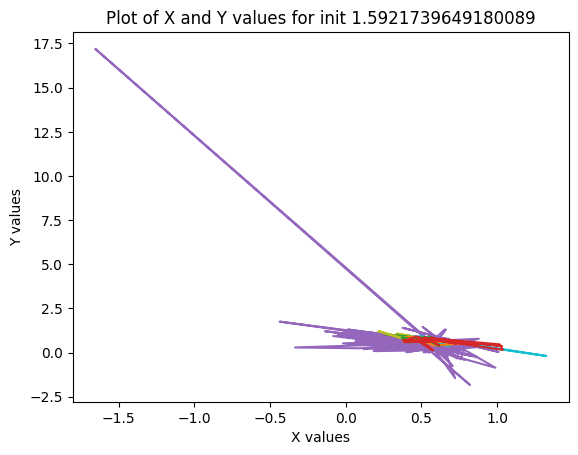

In [10]:
def createPlot(row):
    x = row.norm_pos_x
    y = row.norm_pos_y

    plt.plot(x,y)

data.apply(createPlot, axis = 1)        
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title(f'Plot of X and Y values for init {i+1}')
plt.show()

In [11]:
from statistics import mean
from math import sqrt
import matplotlib.pyplot as plt
import itertools

# Define Euclidean distance between two points
def dist2p(x1,y1,x2,y2):
    dx=x2-x1
    dy=y2-y1
    return (sqrt((dx**2)+(dy**2)))

# PeyeMMV parameters:
# file: raw gaze data (x,y,passing time)
# t1,t2: spatial parameters for fixation identification
# min_dur: minimum duration threshold for fixation identification
# report_fix: selecting the value '1', raw gaze data and fixation plot is generated
# Run example (after importing peyemmv module): peyemmv.extract_fixations('demo_data.txt',0.25,0.1,150,'1')

def extract_fixations(df,t1,t2,min_dur,report_fix=False):
    # Initialize x,y,t,p(x,y,t)
    x=df['norm_pos_x']
    y=df['norm_pos_y']
    t=df['timestamps']
    p = []
    for i,j,k in zip(x,y,t):
        p.append([i,j,k])

    # Initialize fixation cluster and fixations list
    fix_clust=[]
    fix_clust_t2=[]
    x_t2=[]
    y_t2=[]
    t_t2=[]

    x_gaze=[]
    y_gaze=[]
    t_gaze=[]
    fixations=[]

    # Initialize fixation mean point
    fixx=x[0]
    fixy=y[0]
        
    for point in p:
        dist=dist2p(fixx,fixy,point[0],point[1])
        
        #check spatial threshold
        if dist<t1:
            x_gaze.append(point[0])
            y_gaze.append(point[1])
            t_gaze.append(point[2])
            fixx=mean(x_gaze)
            fixy=mean(y_gaze)
                    
        else:
            # Put all gaze points in a fixation cluster
            fix_clust.append([x_gaze,y_gaze,t_gaze])
            if len(fix_clust[0][0])>=1:
                fixx_clust=mean(fix_clust[0][0])
                fixy_clust=mean(fix_clust[0][1])
                
                for (xg,yg,tg) in zip(fix_clust[0][0],fix_clust[0][1],fix_clust[0][2]):
                    if dist2p(fixx_clust,fixy_clust,xg,yg)<t2:
                        x_t2.append(xg)
                        y_t2.append(yg)
                        t_t2.append(tg)
                        
                fixx_clust_t2=mean(x_t2)
                fixy_clust_t2=mean(y_t2)
                fixdur_clust_t2=t_t2[-1]-t_t2[0]
                                    
                # Check minimum duration threshold
                if fixdur_clust_t2>=min_dur:
                    #mean_x,mean_y,dur,start,end
                    fixations.append([fixx_clust_t2,fixy_clust_t2,fixdur_clust_t2,t_t2[0],t_t2[-1],len(t_t2)])
                    
            # Initialize fixation mean point and gaze points
            fixx=point[0]
            fixy=point[1]
            x_gaze=[]
            y_gaze=[]
            t_gaze=[]
            fix_clust=[]
            fix_clust_t2=[]
            x_t2=[]
            y_t2=[]
            t_t2=[]
                
    # Generate fixation report (plot values)  
    if report_fix:
        #print final fixations
        x_fix=[]
        y_fix=[]
        dur_fix=[]
        print("Fixation_ID [X_coord, Y_coord, Duration, Start_time, End_time, No_gaze_points]")
        
        # Define a fixation counter
        fix_count=0
        for fix in fixations:
            fix_count=fix_count+1
            print (fix_count,fix)
            x_fix.append(fix[0])
            y_fix.append(fix[1])
            dur_fix.append(fix[2])
        
        plt.title("Fixation points")
        plt.xlabel("Horizontal coordinates (tracker units)")
        plt.ylabel("Vertical coordinates (tracker units)")
    
        plt.scatter(x,y,color='blue',marker='+')
        plt.scatter(x_fix,y_fix,color='red',marker='.')
        plt.legend(['raw gaze data','fixation centers and their durations'],loc='best')
        for i in range(len(x_fix)):   
            plt.text(x_fix[i],y_fix[i],"{:.1f}".format(dur_fix[i]),color='red')
        plt.grid()
        plt.show()
    else:
        pass

    return(fixations)

In [12]:
def get_fixations(df):
    f = np.array(extract_fixations(df,0.01,0.01,0.001))
    xmin = f[:,0].min()
    xmax = f[:,0].max()
    f[:,0] = (f[:,0] - xmin + 0.011) / ((xmax-xmin) *1.22 )

    ymax = f[:,1].min()
    ymin = f[:,1].max()
    f[:,1] = (f[:,1] - ymin) / ((ymax-ymin) *1.15)

    time_origin = f[0,3]
    f[:,3] = f[:,3] - time_origin
    f[:,4] = f[:,4] - time_origin

    return f

In [13]:
data.head()

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y,timestamps
0,video/Sphere_init1_speed1_perturbation/origina...,695811,0,1,1,0,"[0.5097542699013797, 0.5098323131627824, 0.510...","[0.5641661403146259, 0.5640544016886735, 0.562...","[17373.902166, 17373.906131000003, 17373.91013..."
1,video/Sphere_init4_speed1_perturbation/delta1/...,695811,0,4,1,1,"[0.4988072287526015, 0.4984417047021721, 0.498...","[0.559336151676777, 0.5594607115220199, 0.5595...","[17381.51626, 17381.520253000002, 17381.524223..."
2,video/Sphere_init4_speed1/original/0001-0150.avi,695811,0,4,0,0,"[0.5919849394845184, 0.5914736135106153, 0.591...","[0.581293616612934, 0.5806107129933553, 0.5806...","[17269.8962685, 17269.9002985, 17269.9042945, ..."
3,video/Sphere_init2_speed1_perturbation/origina...,695811,0,2,1,0,"[0.4231882013165211, 0.422250561826619, 0.4218...","[0.5896247364930489, 0.5886907178621058, 0.588...","[17389.124276000002, 17389.128332, 17389.13230..."
4,video/Sphere_init2_speed1_perturbation/delta2/...,695811,0,2,1,2,"[0.5278836117583188, 0.5266154119991386, 0.526...","[0.5375019134066977, 0.5367230350290644, 0.536...","[17277.480345, 17277.484325999998, 17277.48828..."


In [14]:
data["fixations"] = data.apply(lambda x : get_fixations(x),axis = 1)


[]

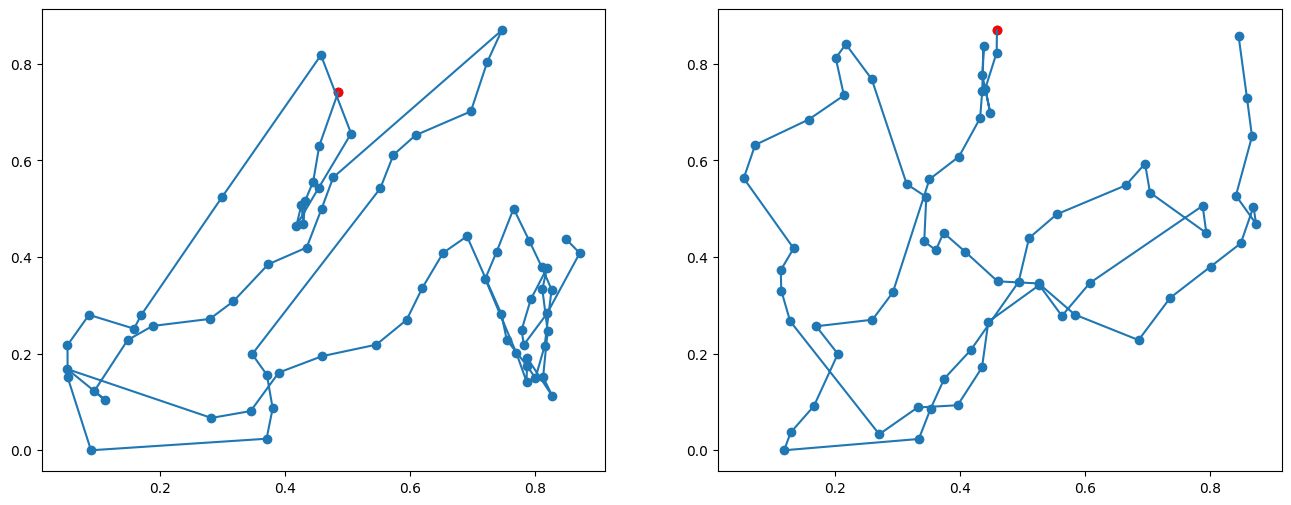

In [15]:
df = data.iloc[0]

fig , (ax1,ax2)= plt.subplots(1,2,figsize=(16,6))
x0 = np.array(data.iloc[0]["fixations"])[:,0]
y0 = np.array(data.iloc[0]["fixations"])[:,1]
ax1.scatter(x0,y0)
ax1.plot(x0,y0)
ax1.scatter(x0[0],y0[0],color='red')

x1 = np.array(data.iloc[1]["fixations"])[:,0]
y1 = np.array(data.iloc[1]["fixations"])[:,1]
ax2.scatter(x1,y1)
ax2.plot(x1,y1)
ax2.scatter(x1[0],y1[0],color='red')

plt.plot()

In [16]:
def show_fixations(row):
    x0 = np.array(row["fixations"])[:,0]
    y0 = np.array(row["fixations"])[:,1]
    plt.scatter(x0,y0)
    plt.plot(x0,y0)
    plt.scatter(x0[0],y0[0],color='red')
    plt.show()

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def make_video(i):
    f = get_fixations(i)
    # Open the video file
    video_path = data.iloc[i].videos
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    T = 1/24
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can use other codecs like 'XVID'
    output_path = 'output_video.mp4'
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Check if the VideoWriter is opened successfully
    if not out.isOpened():
        print("Error: Could not open output video.")

    i_fix = 0
    i_frame = 0
    # Process each frame
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break
        
        if i_fix ==0: fixations = [f[0]]
        elif i_fix ==1: fixations = f[0:2] 
        else: fixations = f[i_fix-2:i_fix+1]
        
        x0,y0 = None,None
        for fix in fixations:
            x , y = fix[0:2]
            x1,y1 = int(x*width), int(y*height)
            # Draw circles
            cv2.circle(frame, (x1,y1), 2, (0, 0, 255), 2)
            cv2.circle(frame, (x1,y1), 20, (0, 0, 255), 1)

        # Draw lines between the circles
            if (x0,y0) != (None,None):
                cv2.line(frame, (x0, y0), (x1,y1), (255, 0, 0), 1)
            
            x0,y0 = x1,y1
        # Write the modified frame to the output video
        out.write(frame)
        i_frame += 1
        # print(T * i_frame,fixations[-1][4])
        if T * i_frame > fixations[-1][4]:
            i_fix += 1

    # Release video capture and writer objects
    cap.release()
    out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

    print("Video processing complete. Output video saved to:", output_path)

make_video(20)

TypeError: 'int' object is not subscriptable

In [18]:
data.head()

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y,timestamps,fixations
0,video/Sphere_init1_speed1_perturbation/origina...,695811,0,1,1,0,"[0.5097542699013797, 0.5098323131627824, 0.510...","[0.5641661403146259, 0.5640544016886735, 0.562...","[17373.902166, 17373.906131000003, 17373.91013...","[[0.485770336066811, 0.7418393787214618, 0.507..."
1,video/Sphere_init4_speed1_perturbation/delta1/...,695811,0,4,1,1,"[0.4988072287526015, 0.4984417047021721, 0.498...","[0.559336151676777, 0.5594607115220199, 0.5595...","[17381.51626, 17381.520253000002, 17381.524223...","[[0.45970276394800486, 0.8695652173913044, 0.2..."
2,video/Sphere_init4_speed1/original/0001-0150.avi,695811,0,4,0,0,"[0.5919849394845184, 0.5914736135106153, 0.591...","[0.581293616612934, 0.5806107129933553, 0.5806...","[17269.8962685, 17269.9002985, 17269.9042945, ...","[[0.8244158960327149, 0.4508649545857004, 0.84..."
3,video/Sphere_init2_speed1_perturbation/origina...,695811,0,2,1,0,"[0.4231882013165211, 0.422250561826619, 0.4218...","[0.5896247364930489, 0.5886907178621058, 0.588...","[17389.124276000002, 17389.128332, 17389.13230...","[[0.09208503184042073, 0.7974331627131096, 0.3..."
4,video/Sphere_init2_speed1_perturbation/delta2/...,695811,0,2,1,2,"[0.5278836117583188, 0.5266154119991386, 0.526...","[0.5375019134066977, 0.5367230350290644, 0.536...","[17277.480345, 17277.484325999998, 17277.48828...","[[0.3223740727938541, 0.3739648318608034, 0.08..."


In [19]:
from objectCenter import df as objectCenter
objectCenter.head()

,maskPath,videoPath,objectCenter
0,video/Videos - mask/Sphere_init1_speed1/delta1...,video/Sphere_init1_speed1/delta1/0001-0150.avi,"[(0.2530112283954005, 0.13611252126667034), (0..."
1,video/Videos - mask/Sphere_init1_speed1/delta2...,video/Sphere_init1_speed1/delta2/0001-0150.avi,"[(0.2530112283954005, 0.13611252126667034), (0..."
2,video/Videos - mask/Sphere_init1_speed1/origin...,video/Sphere_init1_speed1/original/0001-0150.avi,"[(0.2530112283954005, 0.13611252126667034), (0..."
3,video/Videos - mask/Sphere_init1_speed1_pertur...,video/Sphere_init1_speed1_perturbation/delta1/...,"[(0.2530112283954005, 0.13611252126667034), (0..."
4,video/Videos - mask/Sphere_init1_speed1_pertur...,video/Sphere_init1_speed1_perturbation/delta2/...,"[(0.2530112283954005, 0.13611252126667034), (0..."


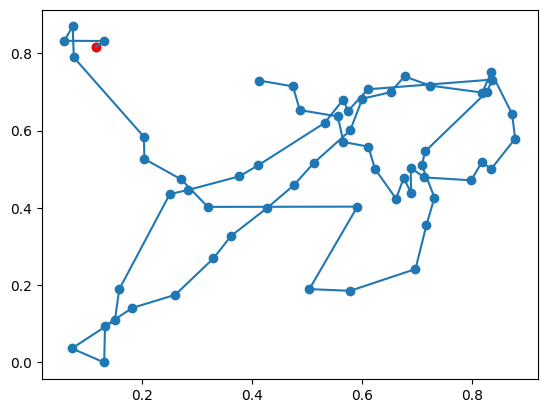

In [20]:
show_fixations(data.iloc[20])

In [74]:
video_path  = data.iloc[0].videos
fixations = data.iloc[0].fixations

center  = objectCenter[objectCenter['videoPath'] == video_path]['objectCenter'].tolist()[0]

d = np.zeros(len(center))
i_frame = 0

for i , fix  in enumerate(fixations):
    x , y , _ , ti , te  = fix[0:5]
    t = i_frame * 1/24
    while t < te:
        t = i_frame * 1/24
        x_center , y_center = center[i_frame]
        dist = (x_center - x) ** 2 + (y_center - y) ** 2
        d[i_frame] = dist
        i_frame+=1

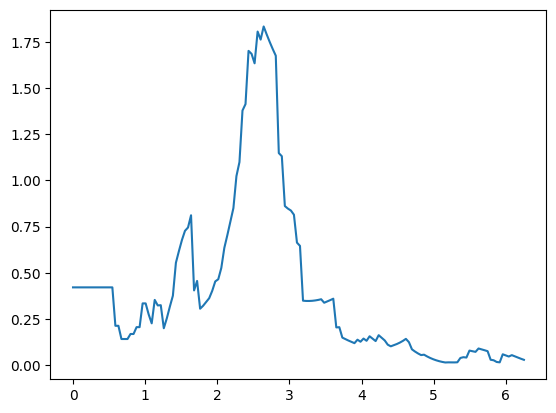

In [75]:
nt = np.array(range(i_frame)) * 1/24
time = np.linspace(0,6.25,150)
plt.plot(time,d)